# Desarrollo en Serie de Fourier de señales periódicas

En este cuaderno veremos algunos de los espectros de señales vistos en clase y cómo se puede aproximar una señal cualquiera con sumas de sinusoides.

In [17]:
%matplotlib inline
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation
from IPython.display import HTML

#Hacer que las figuras por defecto salgan más grandes
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)


import math

import warnings
warnings.filterwarnings('ignore')
import utils as U
import UPVlog
nombre_cuaderno='P2-2-DSF'
mylogger=UPVlog.UPVlog(nombre_cuaderno)

## Señal cuadrada

Comenzaremos creando una función que genere una onda cuadrada a partir de una señal sinusoidal.
Simplemente la señal valdrá uno cuando la sinusoide *subyacente* valga >=0 y 0 en caso contrario.

### Generación de la forma de onda temporal

In [3]:
def ondaCuadrada(frecuencia,tiempo):
    '''
    frecuencia : inversa del periodo de la onda cuadrada
    tiempo: vector de instantes de tiempo donde se evalua la onda cuadrada

    Devuelve muestras de la onda cuadrada en los instantes contenidos en 'tiempo'

    Internamente genera un coseno y luego la salida vale 1 cuando el coseno es > 0
    '''
    #Genera una onda cuadrada "analogica"
    # Internamente genera una coseno de la frecuencia correcta y pone a 1 los valores positivos y a cero los negativos
    
    # frecuencia: inversa del periodo
    out = None
    z=np.cos(2*math.pi*frecuencia*tiempo)
    ### BEGIN SOLUTION
    # Se lo podemos hacer en clase
    
    out=(z>0).astype('float64')
    ### END SOLUTION
    return out

0.5
Periodo= 0.5


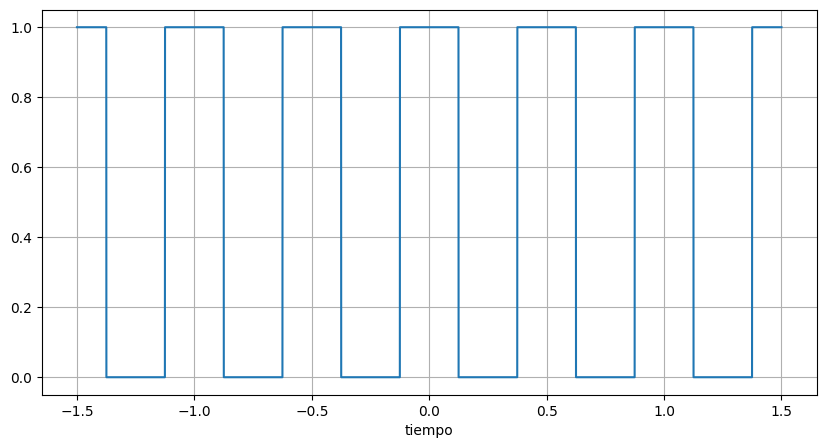

In [4]:
## Prueba de la función
mylogger.log("Testing ondaCuadrada()")
frecuencia = 2
t=np.linspace(-1.5,1.5,5000)

### BEGIN TESTS
s=ondaCuadrada(frecuencia,t)
print(s.mean())
assert s is not None, "Función ondaCuadrada no implementada"
assert s[0] == 1.0, "Función ondaCuadrada con errores"
assert np.max(s) == 1.0 and np.min(s) == 0.0, "Función ondaCuadrada con errores"
assert abs(np.mean(s) -0.5) < 1e-3 ,"Función ondaCuadrada con errores"
### END TESTS

### BEGIN HIDDEN TESTS
### AUTOTEST ondaCuadrada(17,np.linspace(0,7,3214))
### END HIDDEN TESTS
mylogger.log("Success Testing ondaCuadrada()")
_=plt.plot(t,s)
_=plt.grid()
_=plt.xlabel('tiempo')

periodo = 1/frecuencia
print('Periodo=', periodo)

### Generación del espectro

Como cualquier señal periódica, el espectro de la onda cuadrada tiene componentes en los múltiplos de la frecuencia fundamental:
<center>
$$ f_k = k \frac{1}{T} $$    
</center>

Las **amplitudes complejas del espectro bilateral** vienen dadas por la expresión:

<center>
    $$ c_k = A \frac{\tau}{T} \, \mathrm{sinc} \,   f_k \,  \tau $$ 
</center>

donde $A$ es la amplitud de la onda cuadrada, $\tau$ es el ancho de la parte que vale "A" de la onda cuadrada, y $T$ es el periodo.


Programe una función *espectro_cuadrada()* con las siguientes condiciones:

* La función recibirá como entrada:

    *  *tau* : anchura de la parte alta de la onda cuadrada
    
    *  *T*: periodo de la señal
 
    *  *M*: El número de componentes espectrales
 
* Devolverá como salida:

    * Una lista de tuplas (frec,ampl,fas) con las componentes espectrales del **espectro unilateral** correspondientes a las frecuencias $f_k$ con $k=0,1,2, \ldots , M-1$

 ___________________
 
> **RECUERDE** que la relación entre las componentes del espectro bilateral y unilateral:
> * El espectro bilateral representa amplitudes de **fasores** mientras que el unlitateral representa amplitides de **cosenos**
> * Para la frecuencia "0", la componente del e. unilateral y del e. bilateral son idénticas
> * Para cualquier otra frecuencia el espectro unilateral es el doble del bilateral.
>
> Recuerde también que $c_k$ son amplitudes complejas, a partir de las cuales hay que calcular la amplitud real (calculando $|c_k|$) y la fase (calculando el argumento de $c_k$


In [5]:
## OJO: La fórmula del sinc es para cuando se tienen frecuencias positivas y negativas (fasores)
# En el caso de cosenos, las frecuencias distintas de cero llevan un factor 2
# Para el caso de DC el factor 2 no es necesario

def espectro_cuadrada(M,A,tau, T):
    '''
    M: numero de componentes
    A: Altura de la parte alta de la onda cuadrada
    tau: anchura de la parte alta de los pulsos
    T: Periodo
    Función que devuelve el espectro unilateral de una onda cuadrada como
    lista de tuplas (frec,ampl,fase)
    '''
      
    espectro=[]
    for k in range(M):
        fk = k * 1/T
        ck = None
        amplitud = None
        fase = None

        ### BEGIN SOLUTION
        ck=A*tau/T*np.sinc(fk*tau)
        fase = np.angle(ck)
        amplitud = np.abs(ck)
        if k>0: # Paso bilateral a unilateral
            amplitud *= 2
        ### END SOLUTION
        
        componente =(fk,amplitud,fase)         
        espectro.append(componente)
    
    return espectro


In [6]:
#Calculemos el espectro de la onda cuadrada

mylogger.log("Testing espectro_cuadrada")
### BEGIN TESTS
A=1
f0 = 2 # frecuencia fundamental
T = 1/f0
tau= T/2

M=100
espectro=espectro_cuadrada(M,A,tau,T)

assert len(espectro) == M, "Función no implementada"
aas =np.array([c[1] for c in espectro])
assert np.max(np.abs(aas[2::2]))<1e-5, "Error en la función"
assert abs(espectro[0][1]-tau/T)<1e-5,"Error en la función"
assert np.argmax(aas)==1,"Error en la función"
### END TESTS

### BEGIN HIDDEN TESTS
### AUTOTEST espectro_cuadrada(63,2,0.1,0.9)
### END HIDDEN TESTS

mylogger.log("Success Testing espectro_cuadrada")

print("Primeras 10 componentes:")
for k in range(10):
    print(f'( {espectro[k][0]:.2f} , {espectro[k][1]:.2f} , {espectro[k][2]:.2f} )')

Primeras 10 componentes:
( 0.00 , 0.50 , 0.00 )
( 2.00 , 0.64 , 0.00 )
( 4.00 , 0.00 , 0.00 )
( 6.00 , 0.21 , 3.14 )
( 8.00 , 0.00 , 3.14 )
( 10.00 , 0.13 , 0.00 )
( 12.00 , 0.00 , 0.00 )
( 14.00 , 0.09 , 3.14 )
( 16.00 , 0.00 , 3.14 )
( 18.00 , 0.07 , 0.00 )


Observar que:

* Las frecuencias son todos los múltiplos de 2.

* Las amplitudes de los armónicos pares (excepto f=0) son prácticamente nulos.

In [31]:
import pickle

# Save to a pickle file
with open('espectro_cuadrada.pkl', 'wb') as f:
    pickle.dump(espectro, f)

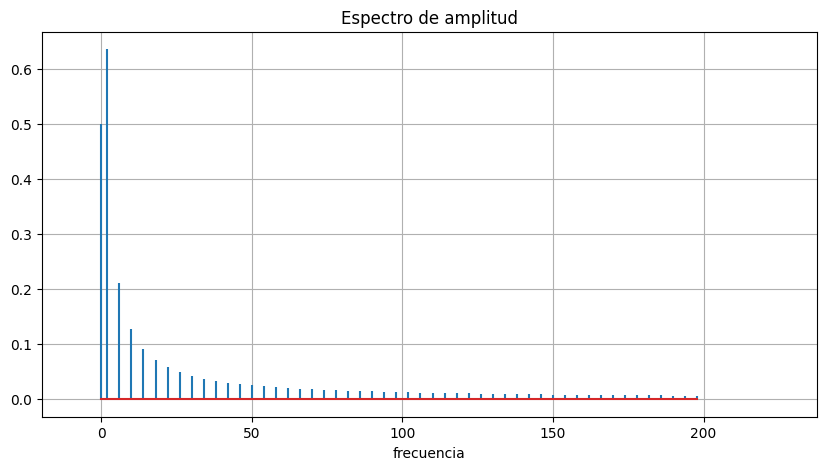

In [26]:
# Podemos visualizar el espectro gráficamente
U.dibujaEspectro(espectro)

### Reconstrucciones parciales

La señal cuadrada es la suma de muchas sinusoides. Podemos estudiar qué sucede a medida que vamos añadiendo sinusoides a la suma.

Empezaremos con una sinusoide más la componente continua:

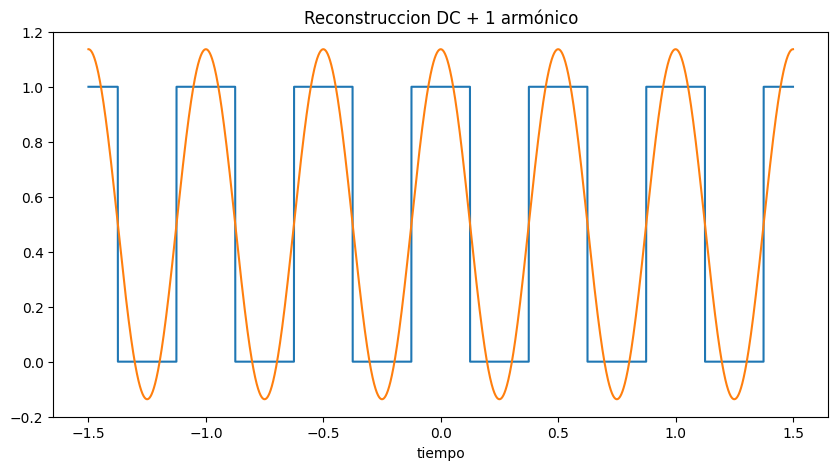

In [27]:
# Obtenemos todas las sinusoides que componen la señal
# componentes es una matriz con tantas columas como sinusoides y tantas filas como instantes de tiempo
componentes=U.creaComponentes(espectro,t)

#Representamos la señal cuadrada
_=plt.plot(t,s)

#Calculamos la suma de la DC + 1 componente ** Recordar que :2 el "2" es EXCLUSIVE
rec1=np.sum(componentes[:,:2],axis=1)

#Representamos la aprox con 1 sinusoide
_=plt.plot(t,rec1)
_=plt.title('Reconstruccion DC + 1 armónico')
_=plt.xlabel('tiempo')

In [28]:
# Determinar la reconstrucción de 5 armónicos + DC
rec5 = None
### BEGIN SOLUTION
rec5=np.sum(componentes[:,:6],axis=1)
### END SOLUTION

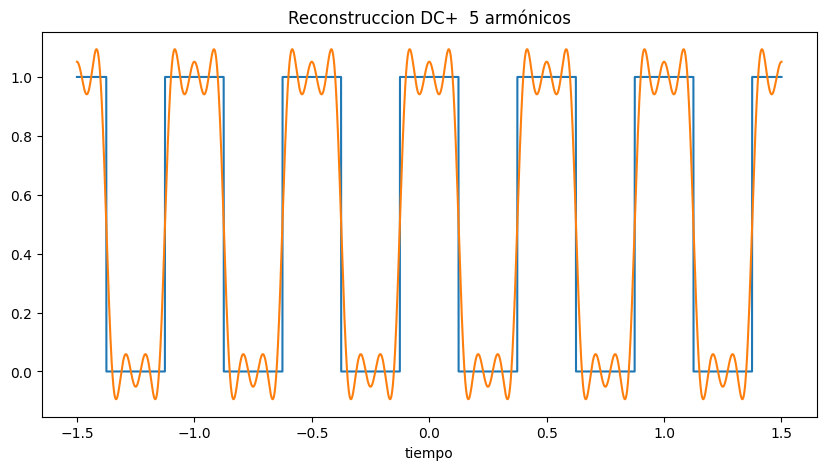

In [29]:
mylogger.log("Testing aprox 5 armónicos")
### BEGIN TESTS

assert rec5 is not None
_=plt.plot(t,s)

_=plt.plot(t,rec5)
_=plt.title('Reconstruccion DC+  5 armónicos')
_=plt.xlabel('tiempo')
### END TESTS
mylogger.log("Success Testing aprox 5 armónicos")

### BEGIN HIDDEN TESTS
assert np.all(np.isclose(rec5,np.sum(componentes[:,:6],axis=1)))
### END HIDDEN TESTS

En la celda anterior debe ver una imagen como esta:
<center>
    <img title="Aprox 5 armónicos" alt="Aprox 5 armónicos" src="images/aprox5.png" width=600>
</center>

In [30]:
# Crear animación viendo como va aproximándose al aumentar los armonicos
fig, ax = plt.subplots()
# Fijar los ejes de la gráfica. Permanecen en la animación
ax.axis( [-1.5 , 1.5, -0.2 , 1.2])
ax.plot(t,s)
l2,=ax.plot(t,componentes[:,0])
_=plt.grid()

# Función para generar gráfica del instante i
def animate(i):
    k=i+1
    j=2*k
    suma=np.sum(componentes[:,:j],axis=1)
    l2.set_data(t,suma)
    ax.set_title("DC + " + str(j-1) + " armonicos")


ani=matplotlib.animation.FuncAnimation(fig=fig, func=animate, frames=30)
_=plt.close(fig)

HTML(ani.to_jshtml())

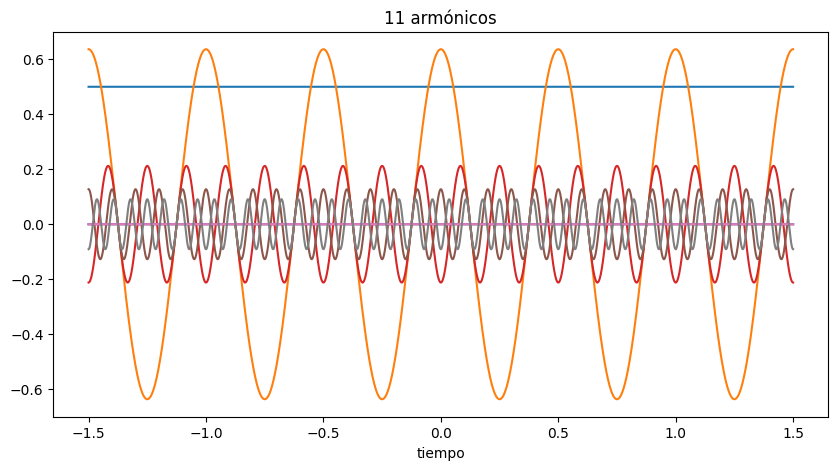

In [23]:
# Es posible ver las 7 primeras sinusoides

_=plt.plot(t,componentes[:,:8])
_=plt.title('7 primeros armónicos armónicos')
_=plt.xlabel('tiempo')